# Перцептрон для восприятия цифр
__Суммарное количество баллов: 10__

В этом задании вам предстоит реализовать классический перцептрон, немного улучшить его, и протестировать результат на классической задаче определния цифр по изображениям.

In [4]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
import copy

### Задание 1 (3 балла)
Для начала реализуем простой перцептрон.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` - инициализирует веса перцептрона, а затем обновляет их в течении `iterations` итераций. 

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

In [1138]:
class Perceptron:
    def __init__(self, iterations=100):
        self.w = None
        self.iterations = iterations

    
    def fit(self, X, y):
        _y = np.array(y)
        _y[_y==0] = -1
        self.w = np.random.sample(X.shape[1] +1)
        for it in range(0, self.iterations):
            predicted = self._predict(X)
            for x, pred, cy in zip(X, predicted, _y):
                if(pred!=cy):
                    self.w[0] += cy
                    self.w[1:] += x*cy
                    break

    def _predict(self, X):
        return np.sign(np.sum(self.w[1:] * X + self.w[0], axis = 1))

    def predict(self, X):
        predicted = self._predict(X)
        predicted[predicted==-1] = 0
        return predicted

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

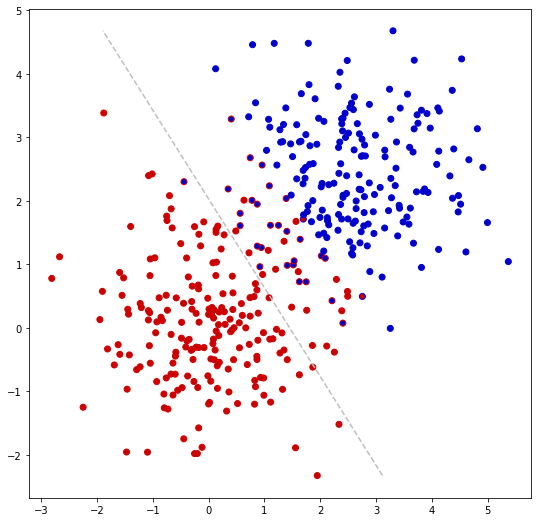

371


In [1227]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = Perceptron(1000)
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)
print(np.sum(np.array(c.predict(X))==true_labels))

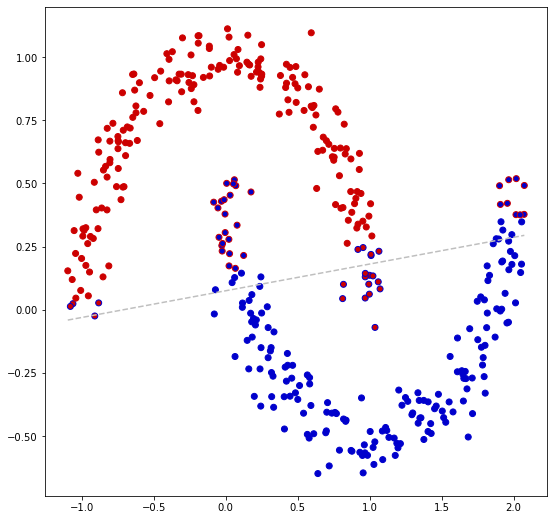

In [1228]:
X, true_labels = make_moons(400, noise=0.075)
c = Perceptron(1000)
c.fit(X, true_labels)

visualize(X, true_labels, np.array(c.predict(X)), c.w)

### Задание 2 (2 балл)
Проблема обычной реализации перцептрона в том, что закончить его обучение мы можем с неоптимальными весами, т.к. точность разбиения в зависимости от числа итераций не растет монотонно. Чтобы этого избежать, мы можем оставлять в конце веса той итерации, на которой мы лучше всего разбивали множество `X`.

Реализуем перцептрон с карманом.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` - инициализирует веса перцептрона, а затем обновляет их в течении `iterations` итераций. В конце обучения оставляет лучшие веса. 

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

In [1219]:
class PerceptronBest:
    def __init__(self, iterations=100):
        self.w = None
        self.iterations = iterations
        self.bestW = None
    
    def fit(self, X, y):
        _y = np.array(y)
        _y[_y==0] = -1
        self.w = np.random.sample(X.shape[1] +1)
        prevGoodCount = 0
        predicted = self._predict(X)
        for it in range(0, self.iterations):
            for x, pred, cy in zip(X, predicted, _y):
                if(pred!=cy):
                    self.w[0] += cy
                    self.w[1:] += x*cy
                    break
            predicted = self._predict(X)
            goodCount = np.sum(predicted==_y)
            if(goodCount > prevGoodCount):
                self.bestW = np.array(self.w)
                prevGoodCount = goodCount

        self.w = self.bestW

    def _predict(self, X):
        return np.sign(np.sum(self.w[1:] * X + self.w[0], axis = 1))

    def predict(self, X):
        predicted = self._predict(X)
        predicted[predicted==-1] = 0
        return predicted

In [1220]:
def visualize(X, labels_true, labels_pred, w):
    unique_labels = np.unique(labels_true)
    unique_colors = dict([(l, c) for l, c in zip(unique_labels, [[0.8, 0., 0.], [0., 0., 0.8]])])
    plt.figure(figsize=(9, 9))

    if w[1] == 0:
        plt.plot([X[:, 0].min(), X[:, 0].max()], w[0] / w[2])
    elif w[2] == 0:
        plt.plot(w[0] / w[1], [X[:, 1].min(), X[:, 1].max()])  
    else:
        mins, maxs = X.min(axis=0), X.max(axis=0)
        pts = [[mins[0], -mins[0] * w[1] / w[2] - w[0] / w[2]],
               [maxs[0], -maxs[0] * w[1] / w[2] - w[0] / w[2]],
               [-mins[1] * w[2] / w[1] - w[0] / w[1], mins[1]],
               [-maxs[1] * w[2] / w[1] - w[0] / w[1], maxs[1]]]
        pts = [(x, y) for x, y in pts if mins[0] <= x <= maxs[0] and mins[1] <= y <= maxs[1]]
        x, y = list(zip(*pts))
        plt.plot(x, y, c=(0.75, 0.75, 0.75), linestyle="--")
    
    colors_inner = [unique_colors[l] for l in labels_true]
    colors_outer = [unique_colors[l] for l in labels_pred]
    plt.scatter(X[:, 0], X[:, 1], c=colors_inner, edgecolors=colors_outer)
    plt.show()

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

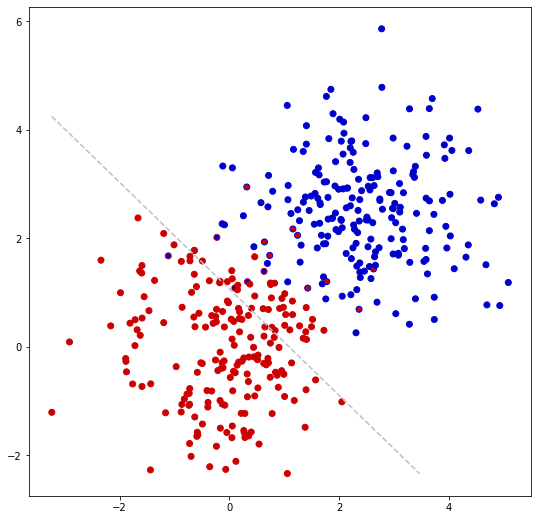

386


In [1225]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = PerceptronBest(10000)
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)
print(np.sum(np.array(c.predict(X))==true_labels))

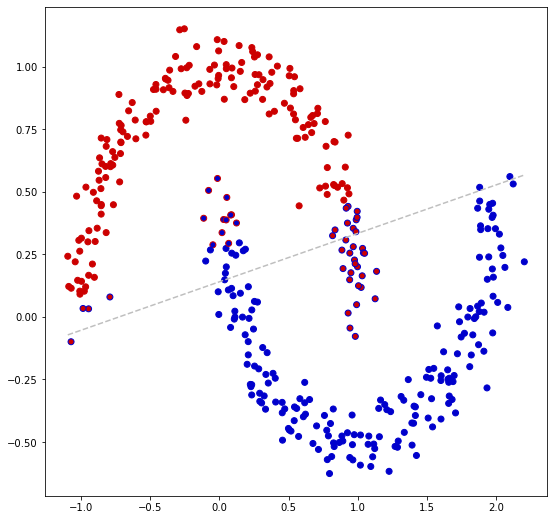

In [1226]:
X, true_labels = make_moons(400, noise=0.075)
c = PerceptronBest()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

### Задание 3 (1 балл)
Реализуйте метод `transform_images(images)`, который преобразует изображения в двумерные векторы. Значение компонент векторов придумайте сами и напишите в виде комментария к методу.

In [1212]:
def transform_images(images):
    imageFeatures = np.zeros((images.shape[0], 2))
    for ind, image in enumerate(images):
        f1 = np.max(image.mean(axis=0)) #средняя интенсивность столбца с максимальной интенсивностью
        f2 = np.max(image.mean(axis=1)) #средняя интенсивность строки с максимальной интенсивностью
        imageFeatures[ind, :] = [f1,f2]

    return imageFeatures

def get_digits(y0=1, y1=5):
    data = datasets.load_digits()
    images, labels = data.images, data.target
    mask = np.logical_or(labels == y0, labels == y1)
    labels = labels[mask]
    images = images[mask]
    images /= np.max(images)
    X = transform_images(images)
    return X, labels

### Задание 4 (4 балла)
Теперь посмотрим на точность обычного перцептрона и перцептрона выбором лучшей итерации. Для тестирования будем использовать цифры 1 и 5. Необходимо использовать реализованное выше преобразование, т.е. только векторы из 2х признаков. 

Точность хотя бы одного из классификаторов на тестовой выборке должна быть больше 80%

In [1173]:
def yZeroOneEncoding(y):
    y[y==min(y)] = 0
    return np.array(y,dtype=int)

In [1216]:
X, y = get_digits()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
y_train[y_train==1] = 0
y_train[y_train==5] = 1
y_test[y_test==1] = 0
y_test[y_test==5] = 1

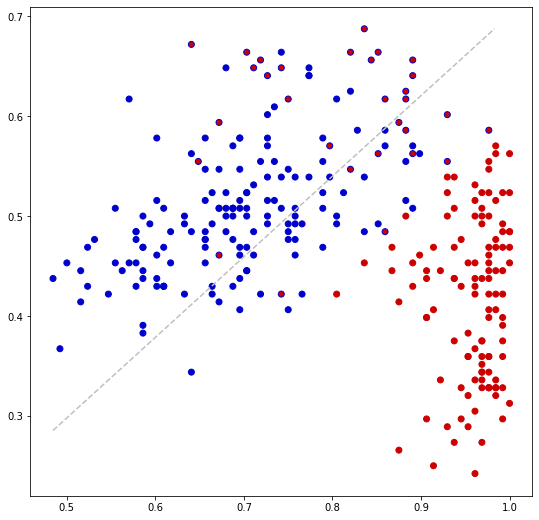

Accuracy: 0.8904109589041096


In [1223]:
c = Perceptron(iterations=20000)
c.fit(X_train, y_train)
predicted = np.array(c.predict(X_train))
visualize(X_train, y_train, predicted, c.w)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))


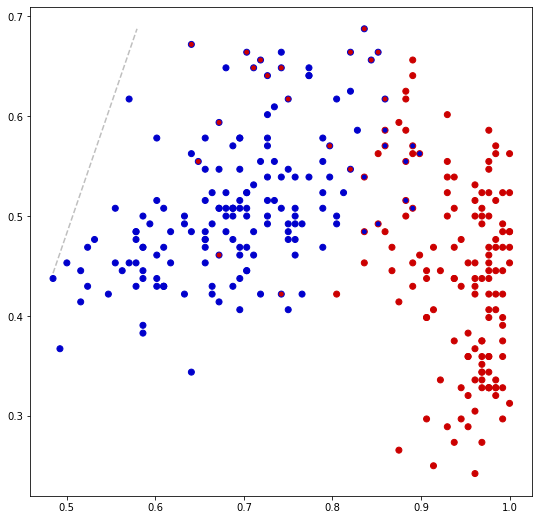

Accuracy: 0.8767123287671232


In [1224]:
c = PerceptronBest(iterations=20000)
c.fit(X_train, y_train)
visualize(X_train, y_train, np.array(c.predict(X_train)), c.w)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))

А теперь посчитаем среднюю точность по всем возможным парам цифр

In [1207]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    
    y_train[y_train==min(y_train)] = 0
    y_train[y_train==max(y_train)] = 1
    y_test[y_test==min(y_test)] = 0
    y_test[y_test==max(y_test)] = 1


    c = Perceptron(iterations=20000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

Mean accuracy: 0.6791164967140915


In [1168]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

    y_train[y_train==min(y_train)] = 0
    y_train[y_train==max(y_train)] = 1
    y_test[y_test==min(y_test)] = 0
    y_test[y_test==max(y_test)] = 1

    c = PerceptronBest(iterations=20000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

Mean accuracy: 0.7310239672433383
